# A2: Correlations in listings_details

Contents:
- Exploring possible correlations
- correlation matrix heatmap
- scatterplot for the variables with the strongest correlations
- pair plot
- categorical plot
- Answers and more questions
- definition of hypothesis

## Leading questions in my project:
- How many listings are there in Berlin? How many of them whole apartments?
- How do prices differ in the different neighbourhoods in Berlin?
- What are most frequent types of rentals (rooms, apartments) in offerings?
- How long are people expected to rent those different room types and does this depend on offered room type (like single bed rooms vs apartments)?
- How many rentals per landlord? If it’s more than one, and it’s an apartment, any maybe with a month minimum nights, this might not be totally legal…
- What are the most popular rentals, judging by the number of reviews over a certain period of time?
- Where are the hosts located…how many percentage are from Germany?
- How many people can be accommodated at maximum?
- How many Berlin- or Germany-based hosts offer, in comparison to how many foreign landlords?

Please note: These were initiative questions, once I settled on the project and immersed myself in the data. Over the analysis, focus interests might take form. This can be a price analysis or any kind of thing.

# Import libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import folium
import json

In [2]:
#importing csv dataset:
path = r'C:\Users\chris\Documents\airbnb_Berlin'
listings = pd.read_csv(os.path.join(path,'02 data', 'prepared data', 'listings_details_wrangled.csv'),index_col=False)

In [3]:
# activating all columns to be seen:
pd.set_option('display.max_columns', 100)

In [4]:
# activating all rows to be seen:
pd.set_option('display.max_rows', None)

In [5]:
listings.columns

Index(['id', 'scrape_id', 'last_scraped', 'source', 'host_id', 'host_name',
       'host_location', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'calculated_host_listings_count', 'reviews_per_month',
       'host_location_cleansed', 'city', 'country', 'country_region'],
      dtype='object')

In [6]:
listings.describe()

,id,scrape_id,host_id,latitude,longitude,accommodates,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
count,1.245400e+04,1.245400e+04,1.245400e+04,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,10087.000000,12454.000000,10087.000000
mean,1.846072e+17,2.023062e+13,1.325207e+08,52.509811,13.402518,2.956801,112.874819,43.813875,667.187651,36.601012,4.680443,7.156897,1.122690
std,3.267252e+17,2.464943e+00,1.543929e+08,0.033451,0.066425,1.884924,121.646464,47.523391,497.172614,78.605044,0.617323,22.391474,1.859747
min,3.176000e+03,2.023062e+13,1.581000e+03,52.369040,13.107580,1.000000,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.010000
25%,1.520356e+07,2.023062e+13,1.278276e+07,52.490266,13.363287,2.000000,50.000000,2.000000,130.500000,1.000000,4.620000,1.000000,0.120000
50%,3.435975e+07,2.023062e+13,5.274744e+07,52.509855,13.411470,2.000000,81.000000,7.000000,1124.000000,7.000000,4.840000,1.000000,0.480000
75%,5.418751e+07,2.023062e+13,2.165452e+08,52.532310,13.437997,4.000000,140.000000,92.000000,1125.000000,33.750000,5.000000,3.000000,1.530000
max,9.188887e+17,2.023062e+13,5.211785e+08,52.656110,13.721390,16.000000,3434.000000,365.000000,9999.000000,2074.000000,5.000000,172.000000,65.330000


## Finding possible correlations: the HEATMAP

In [7]:
# Create a subset with only the columns I want to examine. 

sub = listings[['price', 
          'accommodates',
          'review_scores_rating', 
          'number_of_reviews', 
          'minimum_nights', 
          'maximum_nights',
          'calculated_host_listings_count', 
          'reviews_per_month']]

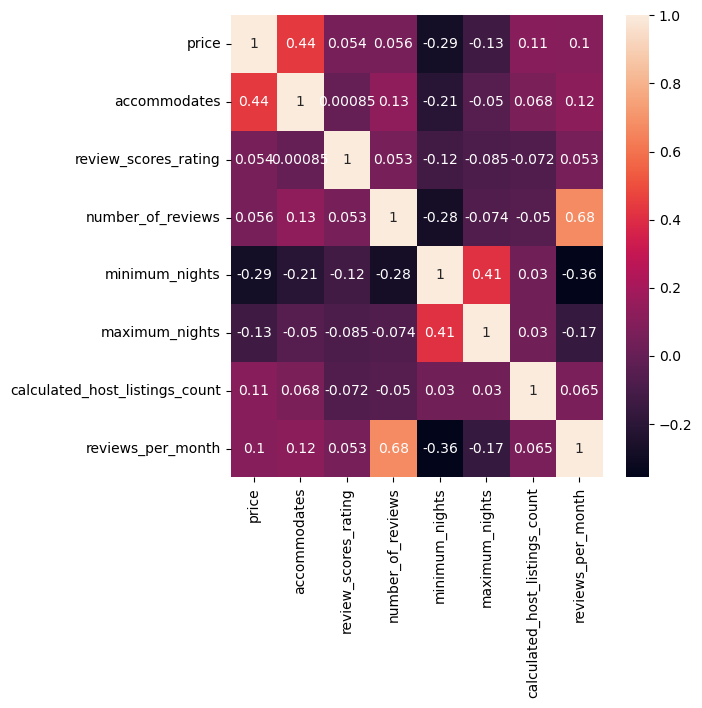

In [8]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(6,6))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap

### Some results of the HEATMAP:

positive correlation (the bigger x = the bigger y): 
- CE = 0,44: price and number of accomodated people
- CE = 0,41: minimum nights and maximum nights. Not interesting - of course when min nights is high, max has to be higher.
- CE = 0,68: number of reviews and reviews per month: indicates, that a lot of reviews are actually from the last month.

negative correlation (the bigger x = the smaller y):
- CE = -0,29: minimum nights and price. Makes sense: If the host has a high number of min nights, he can give the room away for a lower price, has less cleaning costs, and so on. 
- CE = -0,28: minimum nights and number of reviews. Smaller numbers of minimum nights meet higher numbers of reviews - looks like a lot of bookings on airbnb are short stays, if we can argue that the number of reviews is the minimum of bookings.

No correlations:
- surprisingly, the review score rating and the price. I'd thought a high rating correlates with a high price, but the price-determining variables are much more number of beds/accomodates/bedrooms. But with a mean of 4,7 (out of 5) and a median of 4,8 there is possibly not a visible pattern in scores. Airbnb seems to be well established in customers and it is known, that some landlords discretely drop additional charges when they get a good rating instead.

## scatterplot for the variables with the strongest correlations

strongest positive correlation relevant for my analysis: CE = 0,44: price and number of accomodated people

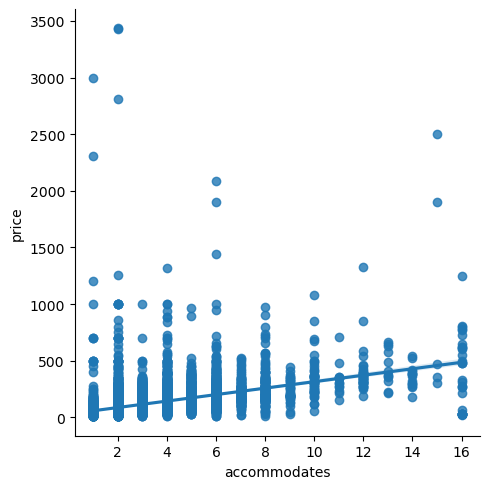

In [9]:
# Create a scatterplot for the "accommodates" and "price" columns in seaborn

sns.lmplot(x = 'accommodates', y = 'price', data = listings)

so, 'accommodates' - the number of accomodated people - is almost categorical, since it doesn't count babies or infants as 'half' people. That makes the scatterplot very tidy, but also a bit harder to guess for other correlations than linear. The higher prices that look like outliers might be high-end lofts or flats - in a metropolitan city, a price for a room or flat has no natural limit. One can see, that with higher number of accommodated people, the price gets higher (as the room or house have to get bigger in some way. For 16 people, the price range starts at a lower point - I guess, because with so many people, there must be some crude dormitories among them with less focus on space and luxuries. 

## pair plot

The task says, to do that for the entire dataset, but the data set is pretty big. I will take the subset form above, boiled down to the most relevant (non-)correlations I've found as a kind of closer look. 

In [10]:
# Keep only the variables you want to use in the pair plot
sub_2 = sub[['price', 'accommodates', 'minimum_nights', 'review_scores_rating', 'number_of_reviews']]

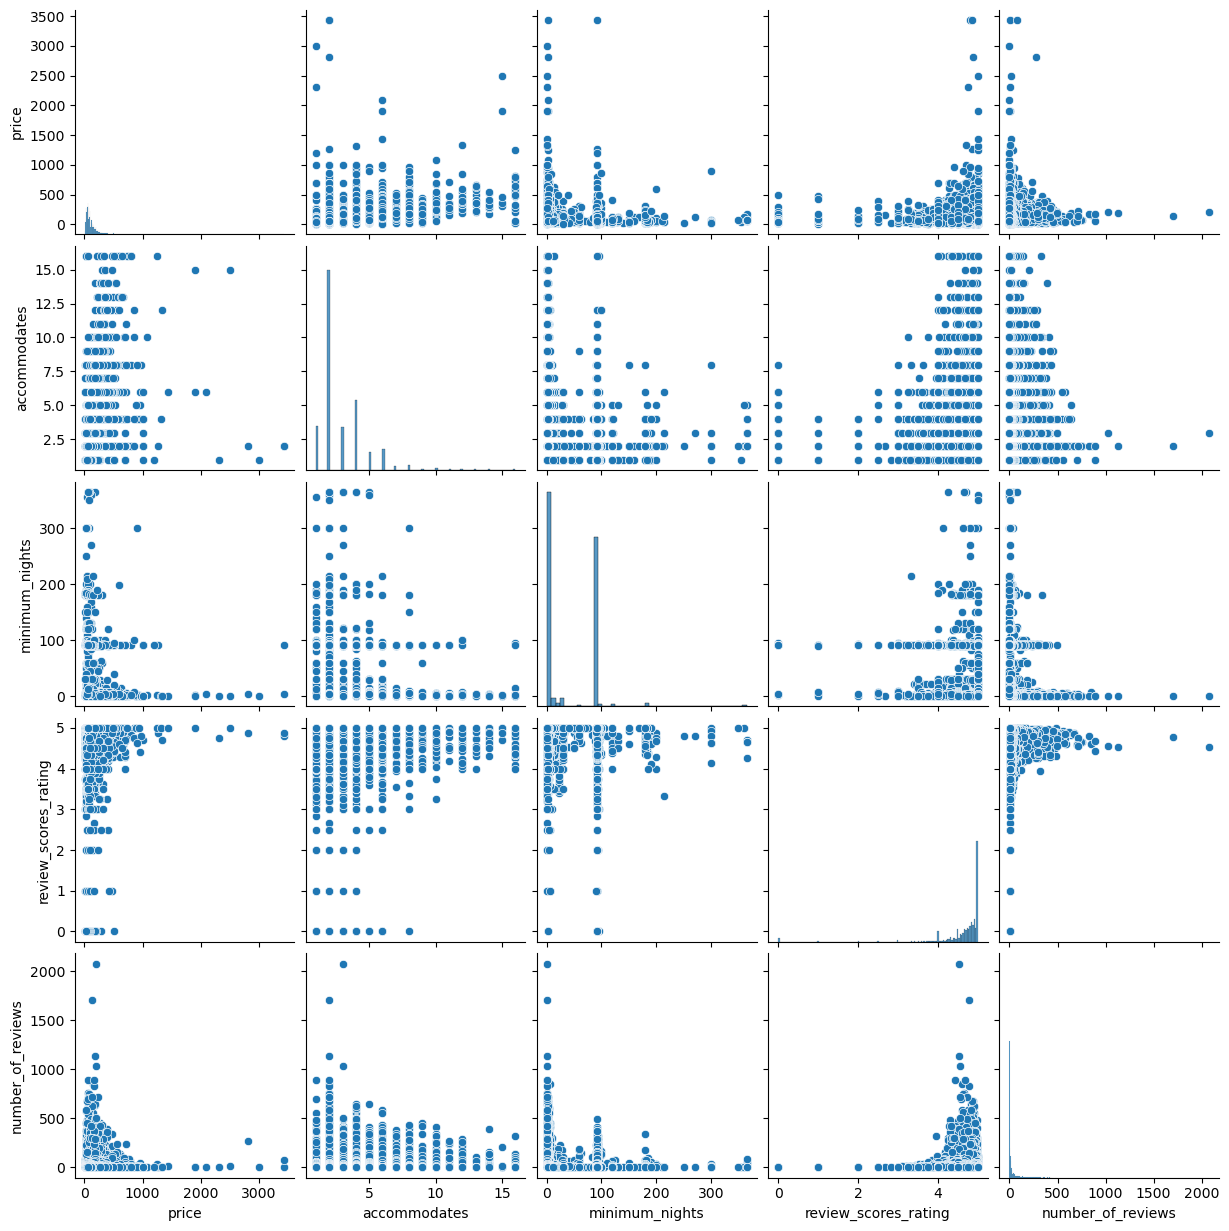

In [11]:
# Create a pair plot 
g = sns.pairplot(sub_2)

<Axes: xlabel='minimum_nights', ylabel='Count'>

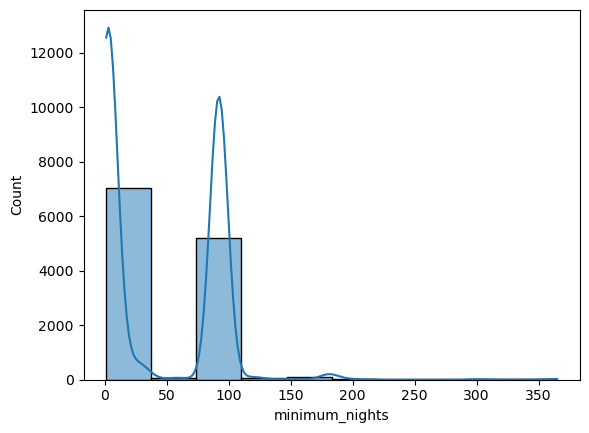

In [12]:
# What is the story with around 90 - 100 min nights? Having a closer look with a histogram:
sns.histplot(listings['minimum_nights'], bins = 10, kde = True)

Thoughts on the results:
- for my analysis, by no doubt 'price' is one the most interesting variables and I intend to an analyse this further. What are the determining variables? There seems to be a certain  'jump when minimum nights are higher than 90 or something, that's about 3 months. I remember there are certain governmental rules about letting apartments longer than 3 months. 
- price and review_scores_rating (that is, the actual rating the property had) - this gives a better picture than the heatmap! One can see, that high ratings (high satisfaction) dominates, and that higher prices ARE more often in listings with higher rates. What this doesn't show, is any causality. 
- the higher the number of reviews, the lower the price: This could mean, that listings with little reviews are the ones rented longest (and therefore couldn't accumulate to many reviews) and those, like shown in the negative correlation betwenn min_nights and price, have cheapest prices.
- accomodates looks pretty straightforward, nothing really interesting there
- minimum nights: Not only in the price, but in the accomodates, review_scores_rating and number of reviews there is a significant jump when 90 - 100 nights are crossed. This is a pattern and I will dig into this.

## categorical plot

### cat plot 1: price range groups

Creating a categorical variable that splits the "Price per Unit" column into categories

<Axes: xlabel='price', ylabel='Count'>

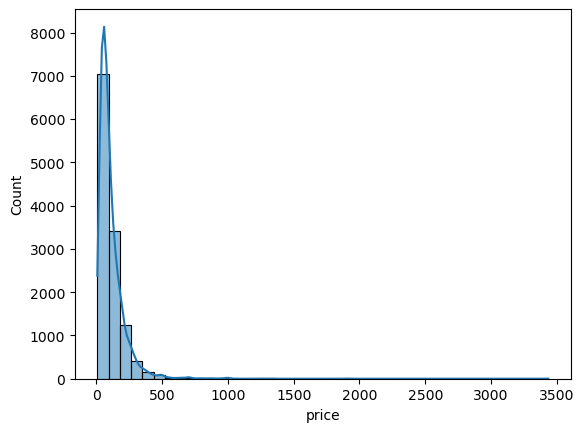

In [13]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(listings['price'], bins = 40, kde = True)

In [14]:
listings['price'].max()

3434.0

In [15]:
listings['price'].mean()

112.87481933515336

In [16]:
listings['price'].median()

81.0

In [17]:
listings.loc[listings['price'] < 80, 'Price category'] = 'Low price'

In [18]:
listings.loc[(listings['price'] >= 80) & (listings['price'] < 160), 'Price category'] = 'Middle price'

In [19]:
listings.loc[listings['price'] >= 160, 'Price category'] = 'High price'

In [20]:
listings['Price category'].value_counts(dropna = False)

Low price       5941
Middle price    4020
High price      2493
Name: Price category, dtype: int64

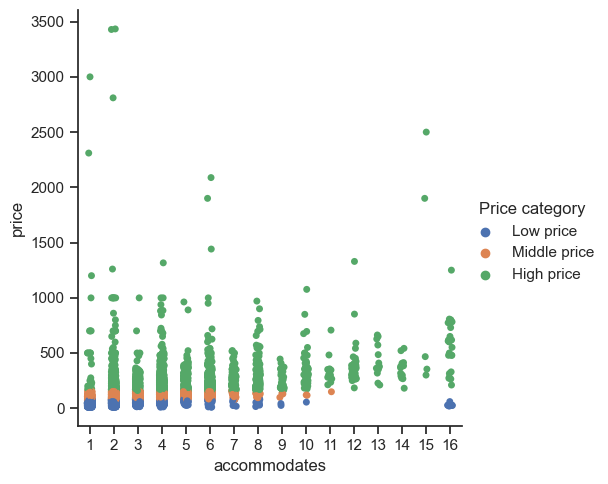

In [21]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="accommodates", y="price", hue="Price category", data=listings)

high-priced listings are present in every category. Low price listings not for listings accomodating 11 - 15 people. At this point, it might be an option, to create a 'price per person' variable, as the real price 1 person has to pay.

### cat plot 2: price and neighbourhoods

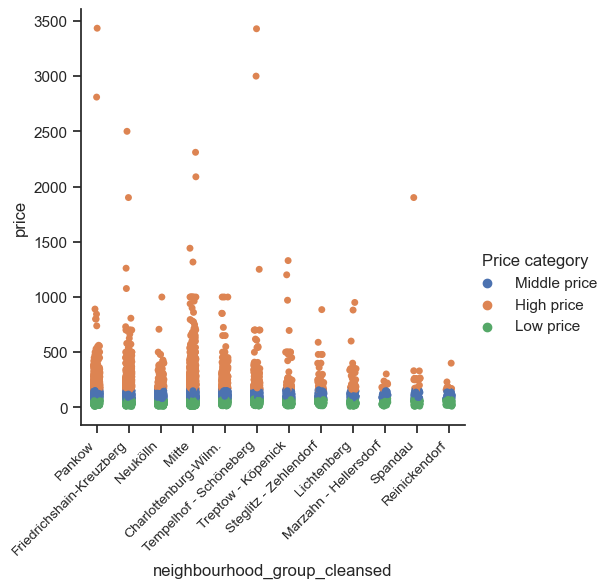

In [22]:
# Create a categorical plot
sns.set(style="ticks")
g = sns.catplot(x="neighbourhood_group_cleansed", y="price", hue="Price category", data=listings)
g.set_xticklabels(rotation=45, ha="right", fontsize=10)  # Rotate and adjust the x-axis labels

ok that's a lot of dots.... I'll go for boxplots.

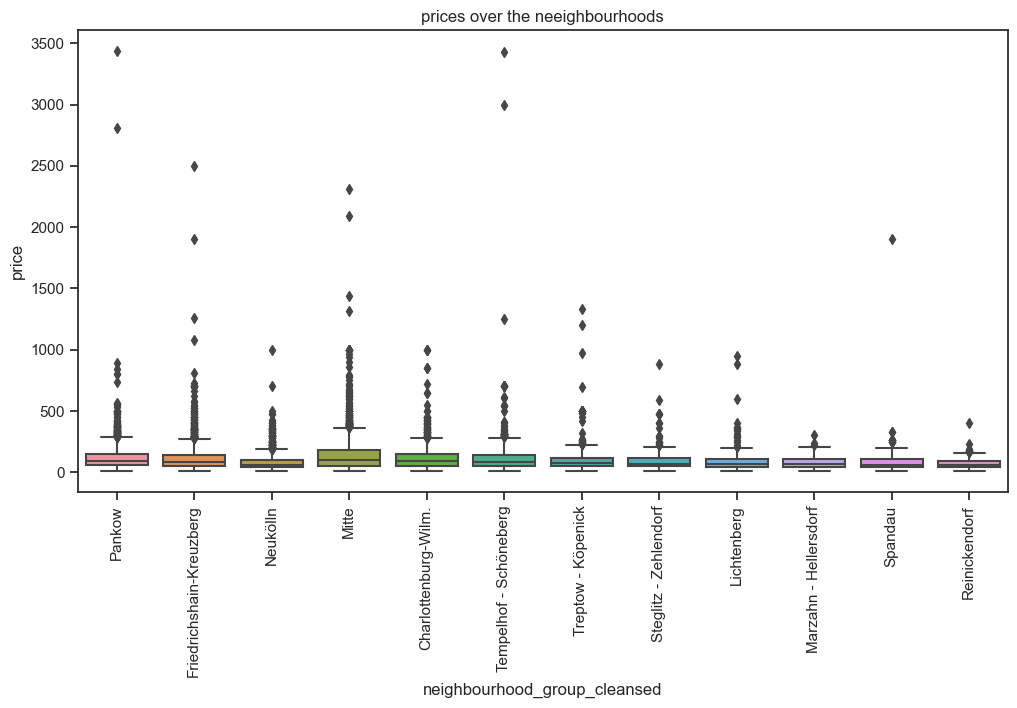

In [23]:
# since 'neighbourhood_group_cleansed' is a categorical variable, we investigate via boxplot:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=listings)
plt.xticks(rotation=90)
plt.title('prices over the neeighbourhoods')
plt.show()

prices in the most central neighbourhood 'Mitte' are highest. No surprise, there are the most sights to see, the central station and so on. But I would have expected the more 'hot' neighbourhoods like Friedrichshain-Kreuzberg to be higher. Possibly because Keuzrberg and F-Hain are indeed 2 separate neighbourhoods. For later analysis, I might need to fix that. And there is 'Prenzlauer Berg' missing, probably conjoined with another neighbourhood. At this point, that means I have to go back to the original data, because I dropped the basic column for this.

### cat plot 3: price and room-type

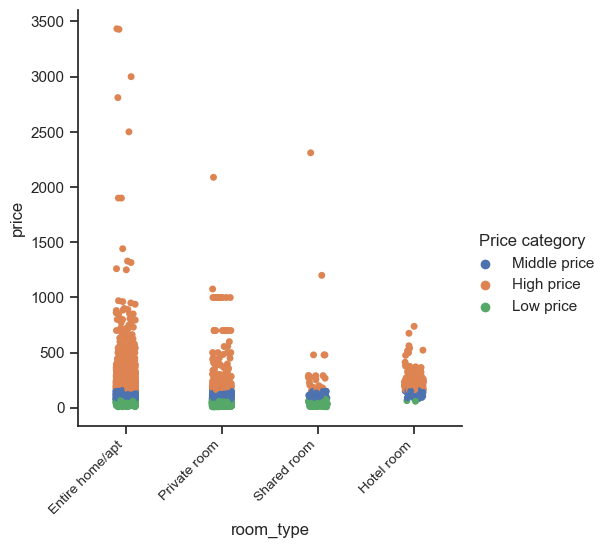

In [24]:
# Create a categorical plot
sns.set(style="ticks")
g = sns.catplot(x="room_type", y="price", hue="Price category", data=listings)
g.set_xticklabels(rotation=45, ha="right", fontsize=10)  # Rotate and adjust the x-axis labels

In [25]:
listings['room_type'].value_counts(dropna=False)

Entire home/apt    8138
Private room       4020
Shared room         162
Hotel room          134
Name: room_type, dtype: int64

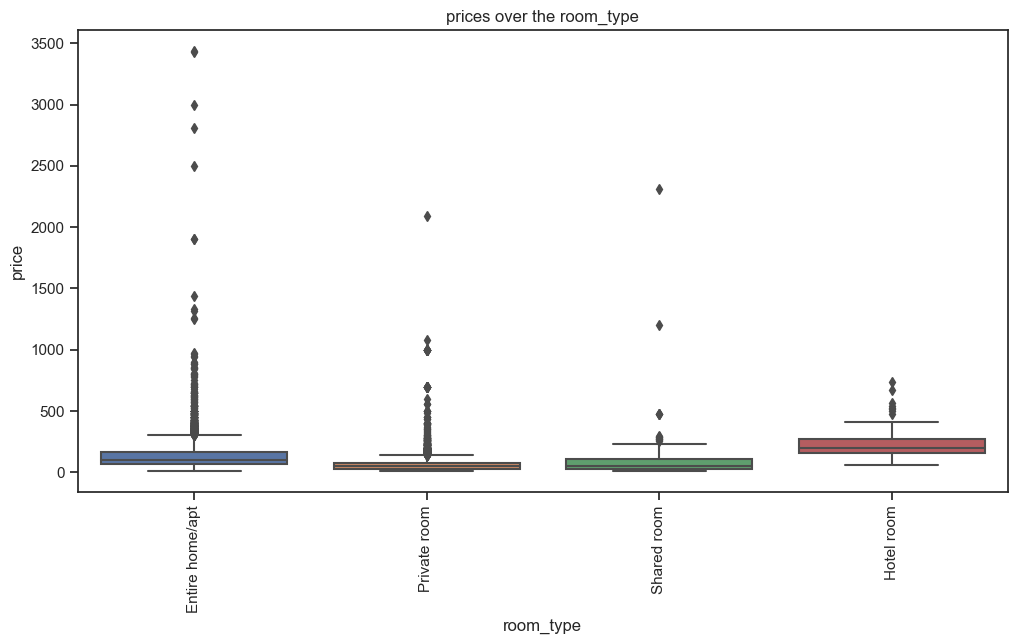

In [26]:
# Another boxplot:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=listings)
plt.xticks(rotation=90)
plt.title('prices over the room_type')
plt.show()

Again, a lot of dots. Apparantly, entire apartments do have quite a lot listings! It would be interesting to see, if the 90-day-step in minimum_nights applies more to them. Hotel rooms are not that much, but a bit higher priced.

## Answers and more questions

OK, I didn't have any real correlation questions at the start. :-)
- if there was a question, what determines the price, definitey things like room-Type, neighbourhodd, and - correlation based - number of accomodated people are worth looking into. Next question would be to create kind of listing-profiles that go along with higher or lower prices. Forecasting the price might be a thing for the regression chapter?
- additional questions: What is the minimum nights story with the 90-100 day mark. It's relevant for the prices as well.

## definition of hypothesis

- Null-Hypothesis: the number of accomodated people has no correlation with the price.
- Alternative Hypothesis (H1): There is a statistically significant correlation between the number of accommodated people and the price.

## Exporting dataframe with price group column listings_details_wrangled.csv

In [27]:
# exporting the dataframe:
listings.to_csv(os.path.join(path, '02 data', 'prepared data', 'listings_details_wrangled.csv'), index=False)

In [28]:
listings.head()

,id,scrape_id,last_scraped,source,host_id,host_name,host_location,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_location_cleansed,city,country,country_region,Price category
0,3176,20230622195229,2023-06-23,previous scrape,3718,Britta,"Coledale, Australia",Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,4,83.0,63,184,148,4.63,1,0.87,"Coledale, Australia",Coledale,Australia,Australia,Middle price
1,9991,20230622195229,2023-06-23,city scrape,33852,Philipp,"Berlin, Germany",Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,7,180.0,6,14,8,5.00,1,0.08,"Berlin, Germany",Berlin,Germany,Germany,High price
2,14325,20230622195229,2023-06-23,city scrape,55531,Chris + Oliver,"Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,Entire rental unit,Entire home/apt,1,70.0,93,1125,26,4.67,4,0.16,"Berlin, Germany",Berlin,Germany,Germany,Low price
3,16644,20230622195229,2023-06-23,city scrape,64696,Rene,"Santa Cruz, CA",nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50312,13.43508,Entire condo,Entire home/apt,5,92.0,93,365,48,4.72,2,0.30,"Santa Cruz, CA",Santa Cruz,country unknown,country unknown,Middle price
4,17904,20230622195229,2023-06-23,city scrape,68997,Matthias,"Rio de Janeiro, Brazil",Reuterstraße,Neukölln,52.49419,13.42166,Entire rental unit,Entire home/apt,2,25.0,92,365,299,4.77,1,1.84,"Rio de Janeiro, Brazil",Rio de Janeiro,Brazil,South America,Low price
